In [5]:
pip install pandas as pd

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [6]:
pip install seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [7]:
import pandas as pd
df = pd.read_csv('data/adult.csv')

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.shape

(32561, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.isnull().sum().sum()

0

##### there is no null value in the dataset

## Data cleaning and EDA

In [16]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
df.duplicated().sum()

24

In [21]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(32537, 15)

## dropping columns

In [23]:
#columns to drop
columns_to_drop = ['fnlwgt' , 'marital-status' , 'relationship' ,'education-num', 'race' , 'sex' ]
df = df.drop(columns = columns_to_drop)

<Axes: xlabel='salary', ylabel='count'>

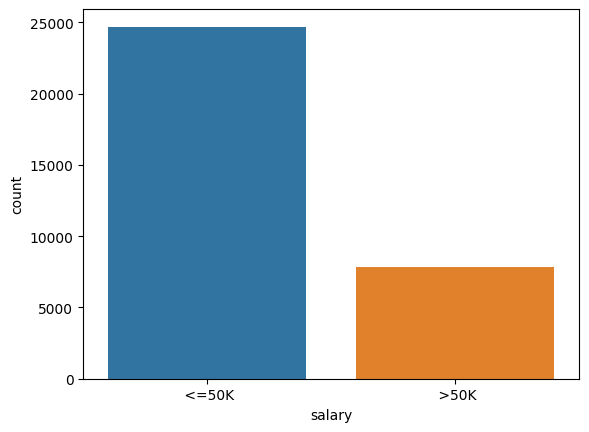

In [25]:
#checking balance of ouput dataset
import seaborn as sns
sns.countplot(x ='salary' , data=df)

## segregating numerical columns and categorical columns

In [26]:
num_cols=df.columns[df.dtypes!='object']
cat_cols=df.columns[df.dtypes=='object']
print('num_cols',num_cols)
print('cat_cols',cat_cols)

num_cols Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')
cat_cols Index(['workclass', 'education', 'occupation', 'country', 'salary'], dtype='object')


In [28]:
df[cat_cols].describe()

,workclass,education,occupation,country,salary
count,32537,32537,32537,32537,32537
unique,9,16,15,42,2
top,Private,HS-grad,Prof-specialty,United-States,<=50K
freq,22673,10494,4136,29153,24698


In [29]:
df[num_cols].describe()

,age,capital-gain,capital-loss,hours-per-week
count,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1078.443741,87.368227,40.440329
std,13.637984,7387.957424,403.101833,12.346889
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


## histogram for all numerical columns

In [31]:
pip install matplotlib.pyplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


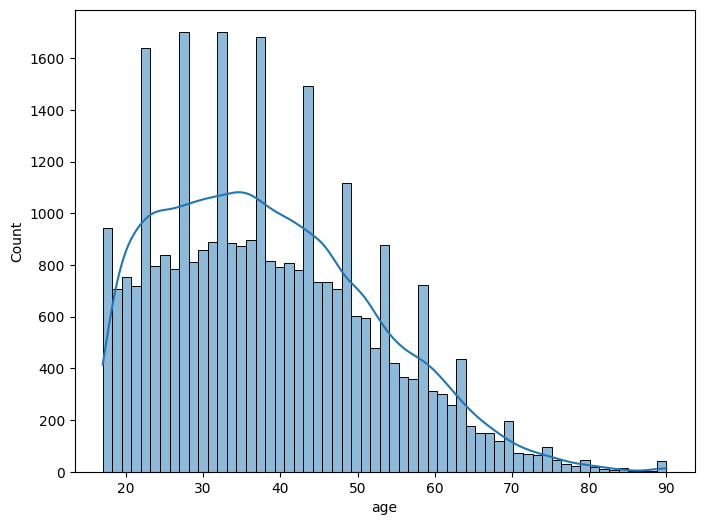

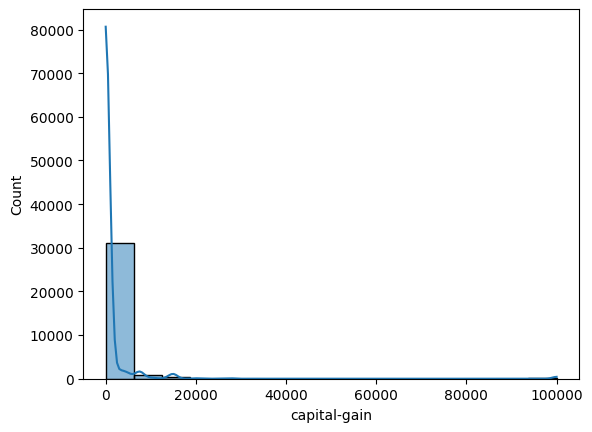

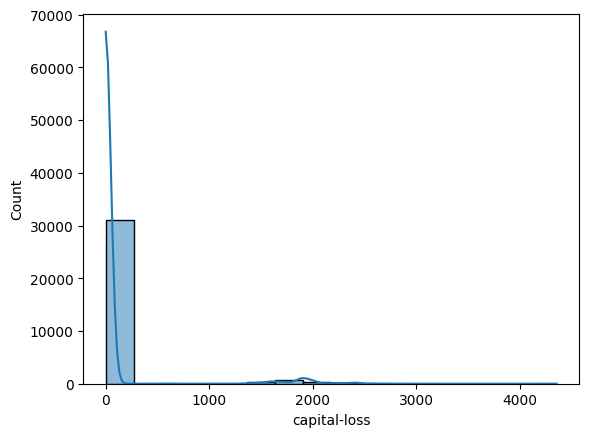

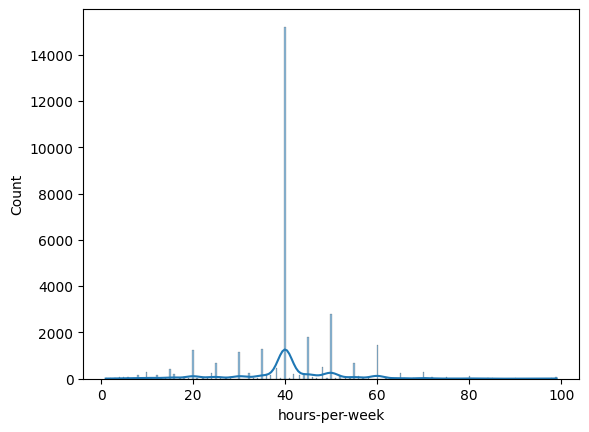

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in num_cols:
    sns.histplot(data=df , x=i , kde=True)
    print('\n')
    plt.show()

### dropping all unecessory variables

In [34]:
df.head()

,age,workclass,education,occupation,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,Bachelors,Adm-clerical,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Handlers-cleaners,0,0,40,United-States,<=50K
3,53,Private,11th,Handlers-cleaners,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Prof-specialty,0,0,40,Cuba,<=50K


In [35]:
df['salary']= df['salary'].apply(lambda x :0 if x == ' <=50 ' else 1)
df['salary'].head()

0    1
1    1
2    1
3    1
4    1
Name: salary, dtype: int64

In [ ]:
## convert numeric data to data type
num_cols=['workclass', 'education', 'occupation', 'capital-gain', 'capital-loss', ]